# Subsets

![SmartSelect_20250304_140422_Samsung Notes.jpg](<attachment:SmartSelect_20250304_140422_Samsung Notes.jpg>)
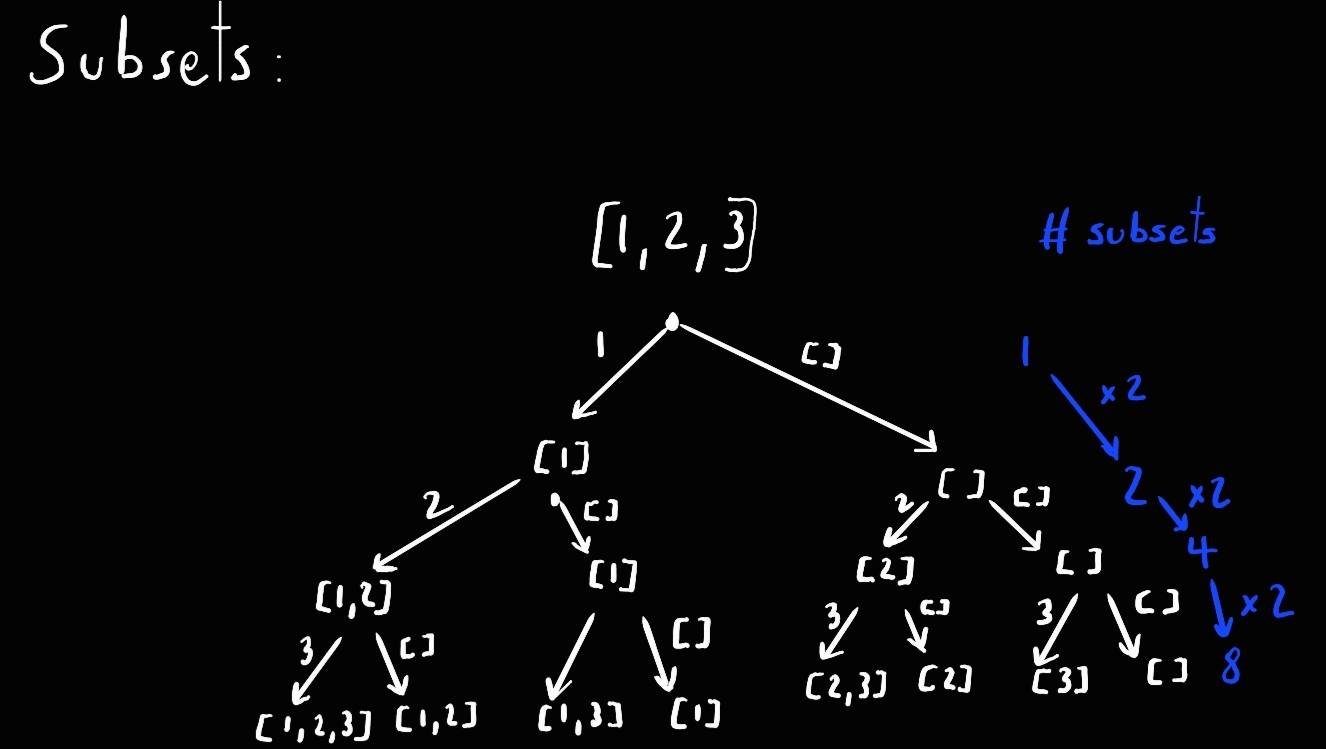

In [ ]:
from typing import List


class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        nums_len = len(nums)
        res = []
        subset = []

        def dfs(i):
            # base case
            if i >= nums_len:
                res.append(subset.copy())
                return
            # decision to include nums[i] (left node)
            subset.append(nums[i])
            dfs(i + 1)
            # decision to NOT include nums[i] (right node)
            subset.pop()
            dfs(i + 1)

        dfs(0)
        return res


sol = Solution()
sol.subsets([1, 2, 3])

# Palindrome partitioning

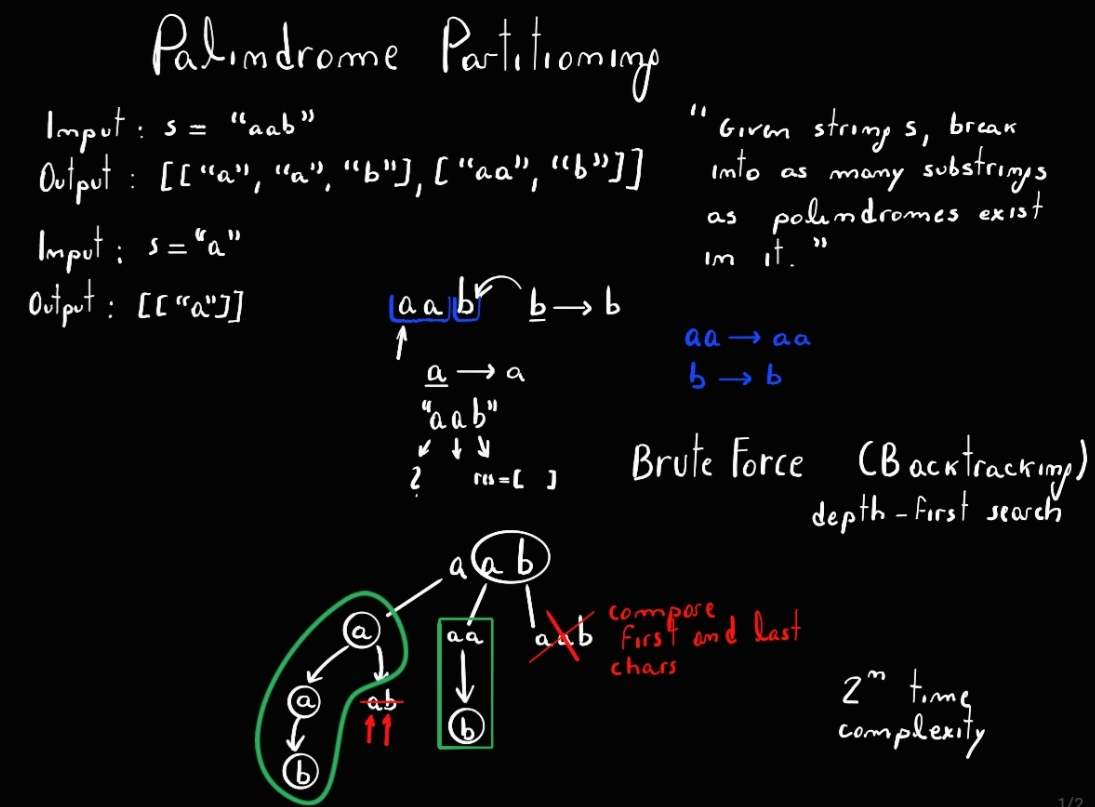

In [ ]:
from typing import List


class Solution:
    def partition(self, s: str) -> List[List[str]]:
        res = []
        part = []
        s_len = len(s)

        def dfs(i):
            # base case (reached last index)
            if i >= s_len:
                res.append(part.copy())
                return
            # we haven't reached last index
            for j in range(i, s_len):
                if self.is_pali(s, i, j):
                    part.append(s[i : j + 1])
                    dfs(j + 1)
                    part.pop()

        dfs(0)
        return res

    def is_pali(self, string, left, right):
        while left < right:
            if string[left] != string[right]:
                return False
            left += 1
            right -= 1
        return True


sol = Solution()
sol.partition("aab")

# Letter combinations of a phone number

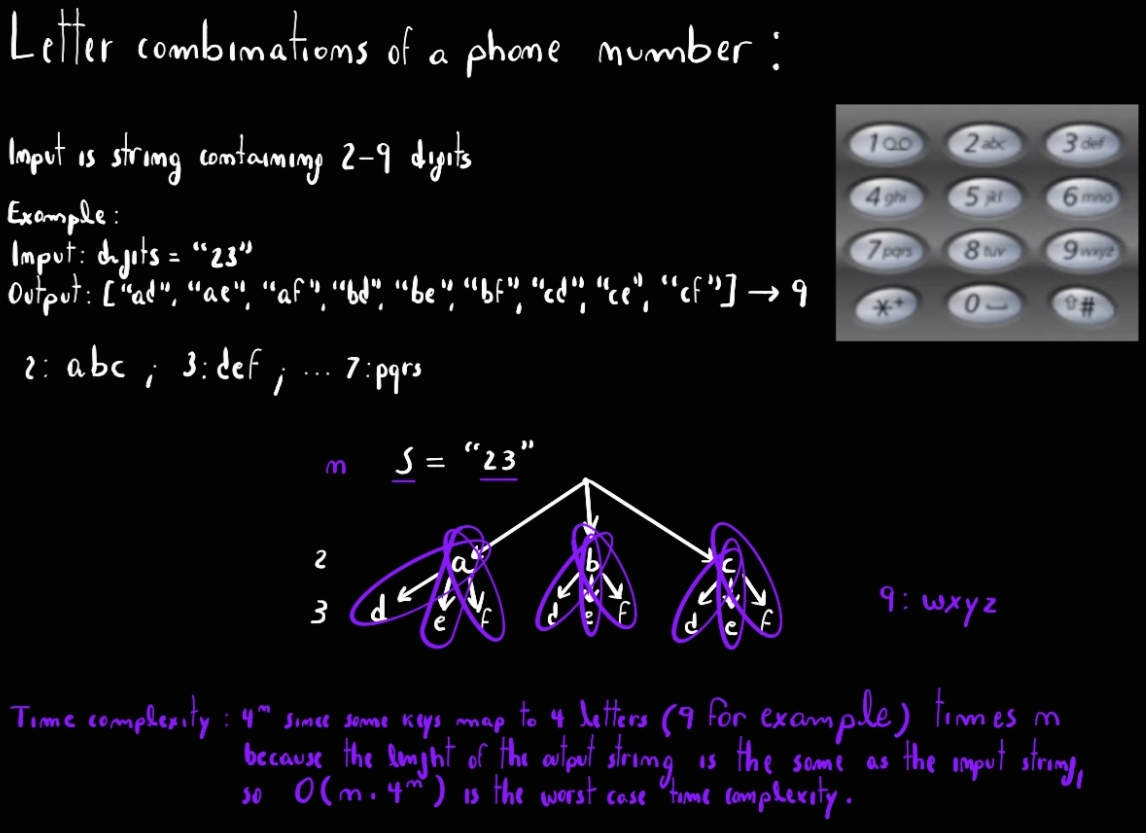

In [ ]:
from typing import List


class Solution:
    def letter_combinations(self, digits: str) -> List[str]:
        res = []
        digit_to_char = {
            "2": "abc",
            "3": "def",
            "4": "ghi",
            "5": "jkl",
            "6": "mno",
            "7": "pqrs",
            "8": "tuv",
            "9": "wxyz",
        }
        digits_len = len(digits)

        def dfs(digit_index, curr_str):
            if len(curr_str) == digits_len:
                res.append(curr_str)
                return
            # we haven't finished building the current string
            # we need to continue going through the digit that
            # we are at, at index 'digit_index'
            for c in digit_to_char[digits[digit_index]]:
                dfs(digit_index + 1, curr_str + c)

        # 'if' necessary because the solution in case digits is
        # an empty string, needs to be an empty list [] and not
        # [""]
        if digits:
            dfs(0, "")
        return res


sol = Solution()
sol.letter_combinations("23")

# Splitting a string into Descending Consecutive Values

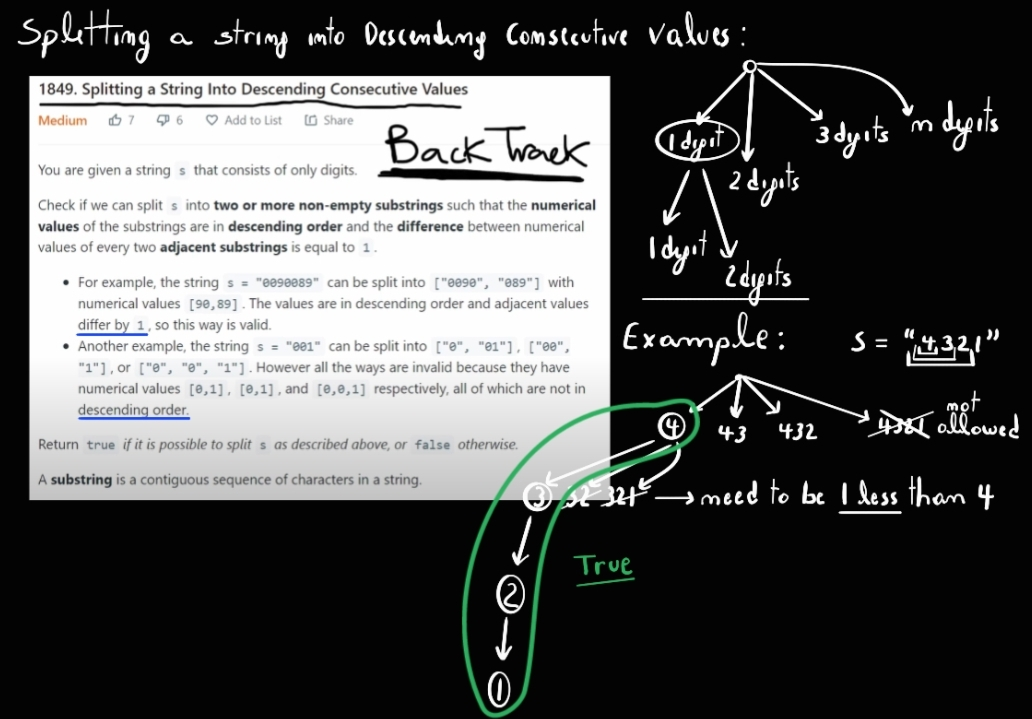

In [ ]:
class Solution:
    def split_string(self, s: str) -> bool:

        def dfs(index, prev):
            if index == len(s):
                return True
            for j in range(index, len(s)):
                val = int(s[index : j + 1])  # this is not the first value
                if val + 1 == prev and dfs(j + 1, val):
                    return True
            return False

        # we don't go to the end because we need to
        # at least split in two
        for i in range(len(s) - 1):
            val = int(s[: i + 1])  # this is the first value
            # if dfs means we end up splitting the string sucessfully
            # so we return True. We pass in the index for the remainder
            # of the string, hence i+1.
            if dfs(i + 1, val):
                return True
        return False


sol = Solution()
sol.split_string("4321")

True

# Combination Sum

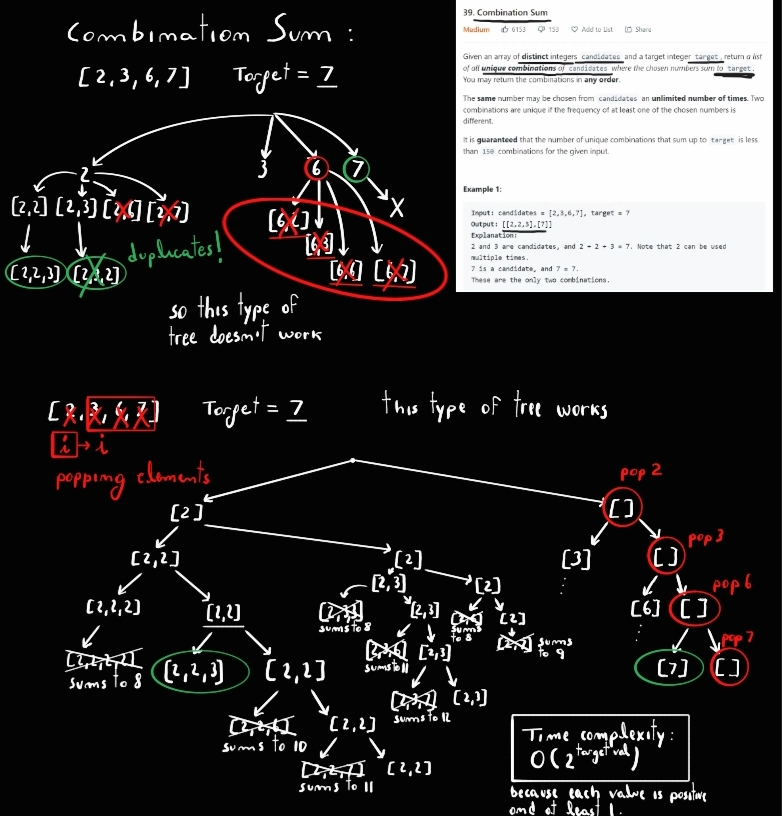

In [ ]:
class Solution:
    def combination_sum(self, candidates: List[int], target: int) -> List[List[int]]:
        res = []

        def dfs(i, cur, total):
            # base case success
            if total == target:
                res.append(cur.copy())
                return
            # base case impossible
            if i >= len(candidates) or total > target:
                return
            # two choices:
            # including the candidate:
            cur.append(candidates[i])
            # i and not i+1 because we want
            # to keep including candidates[i]
            # which means i stays the same
            dfs(i, cur, total + candidates[i])
            # not including the candidate:
            # to remove the candidate
            # that was added
            cur.pop()
            dfs(i + 1, cur, total)

        dfs(0, [], 0)
        return res